# Preprocessing of data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# load data
spotify_df = pd.read_csv('../spotify-datasets/kaggle-yamaerenay-dataset/tracks.csv')
artists_df = pd.read_csv('../spotify-datasets/kaggle-yamaerenay-dataset/artists.csv')

In [20]:
print(spotify_df.shape,artists_df.shape)

(586672, 20) (1162095, 5)


In [21]:
#unlist the artist in the spotify df, this will be important when merging
spotify_df['id_artists'] = [i[2:-2] for i in spotify_df['id_artists']] 

In [22]:
# rename so I don't ahve to modify codes
df = spotify_df 

In [23]:
# convert change date column dtype
df['release_date'] = pd.to_datetime(df['release_date'], format='mixed', yearfirst=True)

In [24]:
# transform
df["release_date"]=df["release_date"].apply(lambda x : x.strftime("%Y"))

In [25]:
# leave only year from date
df['release_date'] = pd.DatetimeIndex(df['release_date']).year

In [26]:
# make age column for binning
df["track_age_FLAG"]=df['release_date'].max()-df["release_date"] # 2021-year, this is a quick way to filter old tracks

In [27]:
df.shape
# (586672, 21)

(586672, 21)

In [28]:
df=df[df["track_age_FLAG"]<40] # remove all songs previous to 1981
# reggaeton was made arund 1990s, kept 1980s just in case

In [29]:
# make era bin
df["era_FLAG"]=pd.cut(df["release_date"],[1981,1989,1999,2009,2021],labels=["1980s","1990s","2000s","2010s"],ordered=False)

/var/folders/12/2vlrlc395y57zpw7blgkklfw0000gn/T/ipykernel_77972/3732094619.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["era_FLAG"]=pd.cut(df["release_date"],[1981,1989,1999,2009,2021],labels=["1980s","1990s","2000s","2010s"],ordered=False)


In [30]:
df.shape
# (387539, 22)

(387539, 22)

In [31]:
df["era_FLAG"].value_counts()

era_FLAG
2010s    125463
1990s    108875
2000s     86841
1980s     66360
Name: count, dtype: int64

In [32]:
spotify_df = df #re-name to original name

In [33]:
spotify_df = spotify_df[spotify_df['speechiness']<0.66] # remove spoken word
spotify_df.shape
#(376024, 22)

(376024, 22)

In [34]:
#prep for merging
artists_df.rename(columns = {'id': 'id_artists','popularity': 'artists_popularity', 'name':'artist_name'}, inplace = True)
artists_df

,id_artists,followers,genres,artist_name,artists_popularity
0,0DheY5irMjBUeLybbCUEZ2,0.0,[],Armid & Amir Zare Pashai feat. Sara Rouzbehani,0
1,0DlhY15l3wsrnlfGio2bjU,5.0,[],ปูนา ภาวิณี,0
2,0DmRESX2JknGPQyO15yxg7,0.0,[],Sadaa,0
3,0DmhnbHjm1qw6NCYPeZNgJ,0.0,[],Tra'gruda,0
4,0Dn11fWM7vHQ3rinvWEl4E,2.0,[],Ioannis Panoutsopoulos,0
...,...,...,...,...,...
1162090,3cOzi726Iav1toV2LRVEjp,4831.0,['black comedy'],Ali Siddiq,34
1162091,6LogY6VMM3jgAE6fPzXeMl,46.0,[],Rodney Laney,2
1162092,19boQkDEIay9GaVAWkUhTa,257.0,[],Blake Wexler,10
1162093,5nvjpU3Y7L6Hpe54QuvDjy,2357.0,['black comedy'],Donnell Rawlings,15


In [38]:
for df in (spotify_df, artists_df):
    # Strip the column(s) you're planning to join with
    df['id_artists'] = df['id_artists'].str.strip()

In [44]:
spotify_df.isna().sum()

id                  0
name                3
popularity          0
duration_ms         0
explicit            0
artists             0
id_artists          0
release_date        0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_age_FLAG      0
era_FLAG            0
dtype: int64

In [45]:
artists_df.isna().sum()

id_artists             0
followers             11
genres                 0
artist_name            3
artists_popularity     0
dtype: int64

In [57]:
df_merged = spotify_df.merge(artists_df, on = 'id_artists', how='inner')
df_merged

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,liveness,valence,tempo,time_signature,track_age_FLAG,era_FLAG,followers,genres,artist_name,artists_popularity
0,6catF1lDhNTjjGa2GxRQNN,You'll Never Walk Alone - Mono; 2002 Remaster,56,160187,0,['Gerry & The Pacemakers'],3UmBeGyNwr4iDWi1vTxWi8,2008,0.484,0.2650,...,0.1490,0.285,113.564,3,13,2000s,175360.0,"['adult standards', 'brill building pop', 'bri...",Gerry & The Pacemakers,55
1,4aSw1QJIMwYSoDEgzgdCJL,Ferry Cross the Mersey - Mono; 2002 Remaster,40,141987,0,['Gerry & The Pacemakers'],3UmBeGyNwr4iDWi1vTxWi8,2008,0.405,0.3650,...,0.1630,0.588,104.536,4,13,2000s,175360.0,"['adult standards', 'brill building pop', 'bri...",Gerry & The Pacemakers,55
2,0ZMMtH875IR2TfkyC4PolD,Don't Let the Sun Catch You Crying (Main) - Mono,34,157093,0,['Gerry & The Pacemakers'],3UmBeGyNwr4iDWi1vTxWi8,2008,0.477,0.3520,...,0.1220,0.478,106.773,4,13,2000s,175360.0,"['adult standards', 'brill building pop', 'bri...",Gerry & The Pacemakers,55
3,7LfvdUcwrrMKVh8WPGXnbA,How Do You Do It? - Mono,29,114987,0,['Gerry & The Pacemakers'],3UmBeGyNwr4iDWi1vTxWi8,2008,0.617,0.7110,...,0.0841,0.963,142.266,4,13,2000s,175360.0,"['adult standards', 'brill building pop', 'bri...",Gerry & The Pacemakers,55
4,25qyOLQyX7bsceW3UL55BW,Hello Little Girl,25,115240,0,['Gerry & The Pacemakers'],3UmBeGyNwr4iDWi1vTxWi8,2008,0.409,0.6390,...,0.3430,0.928,145.903,4,13,2000s,175360.0,"['adult standards', 'brill building pop', 'bri...",Gerry & The Pacemakers,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305983,0MmaEacabpK8Yp3Mdeo5uY,下雨天,50,265846,0,['芝麻'],5VGgFE9nPgMfEnYiPT5J2B,2020,0.528,0.6730,...,0.0989,0.297,130.066,4,1,2010s,929.0,['chinese viral pop'],芝麻,36
305984,1dKxf4Ht2SsKLyXfSDJAgy,The Cutest Puppy,67,82500,0,['Laureen Conrad'],7vgGpuiXdNlCmc994PlMlz,2020,0.609,0.0172,...,0.1080,0.890,68.619,4,1,2010s,23.0,['instrumental lullaby'],Laureen Conrad,52
305985,0SjsIzJkZfDU7wlcdklEFR,John Brown's Song,66,185250,0,['Gregory Oberle'],4MxqhahGRT4BPz1PilXGeu,2020,0.562,0.0331,...,0.1110,0.386,63.696,3,1,2010s,91.0,['instrumental lullaby'],Gregory Oberle,55
305986,5rgu12WBIHQtvej2MdHSH0,云与海,50,258267,0,['阿YueYue'],1QLBXKM5GCpyQQSVMNZqrZ,2020,0.560,0.5180,...,0.0648,0.211,131.896,4,1,2010s,896.0,['chinese viral pop'],阿YueYue,38


### inner join dataset - 305988
### left join - 376024
### I will use inner join as imputing a genre will throw off my clustering

In [61]:
df_merged.shape
(305988, 26)

(305988, 26)

In [60]:
df_merged.isna().sum()
# no nulls

id                    0
name                  0
popularity            0
duration_ms           0
explicit              0
artists               0
id_artists            0
release_date          0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
time_signature        0
track_age_FLAG        0
era_FLAG              0
followers             0
genres                0
artist_name           0
artists_popularity    0
dtype: int64

In [62]:
# repeated songs differ in id, but I will make the assumption that songs with same name and duration are repeats and remove them.
df_merged = df_merged.drop_duplicates(subset=['name', 'duration_ms'])

In [65]:
df_merged.shape

(293127, 26)

In [66]:
586672-293127

293545

In [67]:
293545/586672

0.5003562467613931

We removed 50% of songs:
- era of song not relevant -> 387539
- spoken word, and not actual songs -> 376024
- no genre information thus the inner merge removed them -> 305988
- potential duplicates -> 293127

## One-hot encoding categorical features

Plan to One-hot encoding (OHE):
- explicit (already binarized)
- mode (already binarized)
- key
- time signature
- era flag
- genres
- artists/artist_name

In [70]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 293127 entries, 0 to 305987
Data columns (total 26 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   id                  293127 non-null  object  
 1   name                293127 non-null  object  
 2   popularity          293127 non-null  int64   
 3   duration_ms         293127 non-null  int64   
 4   explicit            293127 non-null  int64   
 5   artists             293127 non-null  object  
 6   id_artists          293127 non-null  object  
 7   release_date        293127 non-null  int32   
 8   danceability        293127 non-null  float64 
 9   energy              293127 non-null  float64 
 10  key                 293127 non-null  int64   
 11  loudness            293127 non-null  float64 
 12  mode                293127 non-null  int64   
 13  speechiness         293127 non-null  float64 
 14  acousticness        293127 non-null  float64 
 15  instrumentalness    29

In [69]:
# source https://www.kaggle.com/code/bedirhanhasanebi/spotify-recommender-system
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

In [72]:
ohe_cols = ["key","time_signature",'era_FLAG']
spotify_ohe=one_hot_encoder(df_merged, ohe_cols,drop_first=True)

I ran this code and manually checked the difference. Method 2 got more songs but incluided everything with reaggeton in it. incluiding religious reggaeton, and reggaeton pop...which I rather not have incluided in my reggaeton label.
```python
# label reggaeton
# testing methods
# Method 1: Using 'apply' and 'eval'
df_method1 = spotify_ohe[spotify_ohe['genres'].apply(lambda x: 'reggaeton' in eval(x))]

# Method 2: Using 'str.contains'
df_method2 = spotify_ohe[spotify_ohe['genres'].str.contains(r'reggaeton', case=False, regex=True)]

# Combine the two DataFrames using 'merge'
combined_df = pd.merge(df_method1, df_method2, how='outer', indicator=True)

# Filter rows present in only one dataset
unique_rows = combined_df[combined_df['_merge'].isin(['left_only', 'right_only'])]

# save the result
unique_rows.to_csv("../../../../Desktop/unique_songs.csv", index=False)

#using regex is a sloppy method to get more reggaeton songs: gets everything, even reggaeton pop which I want to get away
```

In [73]:
#less songs but more specific
spotify_ohe['genres_reggaeton']= spotify_ohe['genres'].apply(lambda x: 'reggaeton' in eval(x))

In [83]:
spotify_ohe['genres_reggaeton'].sum()
#1409 songs

1409

In [74]:
spotify_ohe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 293127 entries, 0 to 305987
Data columns (total 42 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  293127 non-null  object 
 1   name                293127 non-null  object 
 2   popularity          293127 non-null  int64  
 3   duration_ms         293127 non-null  int64  
 4   explicit            293127 non-null  int64  
 5   artists             293127 non-null  object 
 6   id_artists          293127 non-null  object 
 7   release_date        293127 non-null  int32  
 8   danceability        293127 non-null  float64
 9   energy              293127 non-null  float64
 10  loudness            293127 non-null  float64
 11  mode                293127 non-null  int64  
 12  speechiness         293127 non-null  float64
 13  acousticness        293127 non-null  float64
 14  instrumentalness    293127 non-null  float64
 15  liveness            293127 non-null  fl

In [75]:
# get numerical, musical feature variables only
spotify_ohe_nums = spotify_ohe.drop(['genres', 'artist_name', 'id_artists', 'artists', 'name', 'id', 'release_date', 'followers', 'track_age_FLAG', 'popularity', 'artists_popularity'], axis=1)
spotify_ohe_nums.info()

<class 'pandas.core.frame.DataFrame'>
Index: 293127 entries, 0 to 305987
Data columns (total 31 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   duration_ms       293127 non-null  int64  
 1   explicit          293127 non-null  int64  
 2   danceability      293127 non-null  float64
 3   energy            293127 non-null  float64
 4   loudness          293127 non-null  float64
 5   mode              293127 non-null  int64  
 6   speechiness       293127 non-null  float64
 7   acousticness      293127 non-null  float64
 8   instrumentalness  293127 non-null  float64
 9   liveness          293127 non-null  float64
 10  valence           293127 non-null  float64
 11  tempo             293127 non-null  float64
 12  key_1             293127 non-null  bool   
 13  key_2             293127 non-null  bool   
 14  key_3             293127 non-null  bool   
 15  key_4             293127 non-null  bool   
 16  key_5             293127 

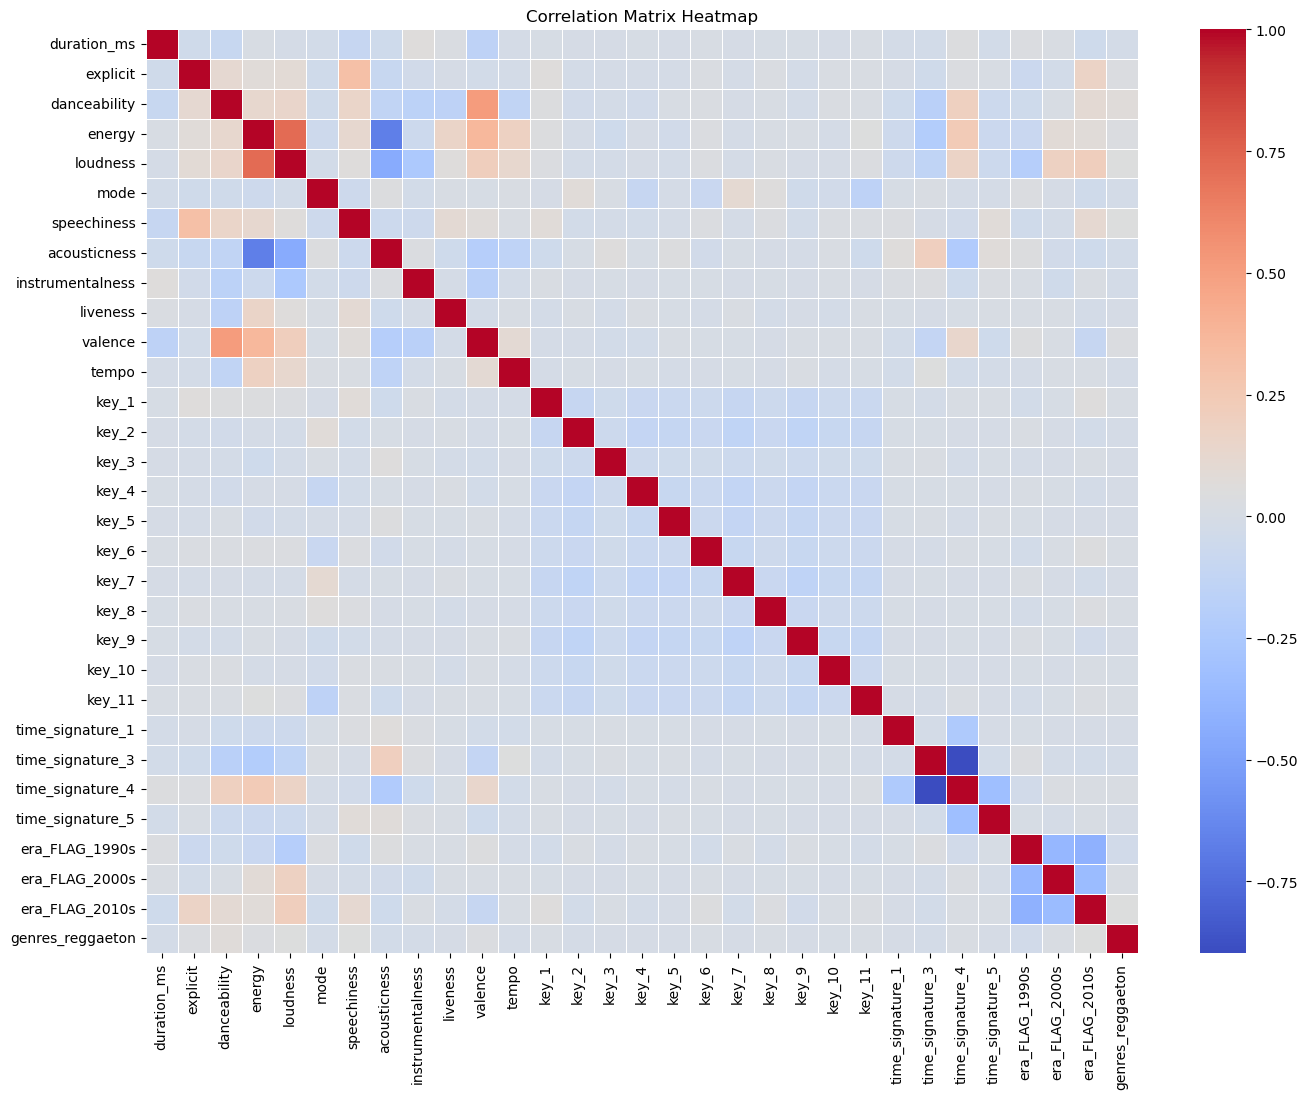

In [76]:
correlation_matrix = spotify_ohe_nums.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

OHE recap:
- explicit (already binarized)
- mode (already binarized)
- done-key 
- done-time signature
- done-era flag
- super hard and messy to bin-genres
- not advised to OHE this many features-artists/artist_name

Revelant Correlation recap:
"corr +" = positive correlation
"corr -" = negative correlation
- tried with scaled data and nothing changed; probably .corr() scales it.
- explicit corr + with speechiness, energy, danceability, and loudness
- loudness corr + with energy 
- danceability corr + speechiness, energy, loudness, explicit, time_signature_4, and era 2010s

### Save files

In [78]:
df_merged.to_csv("../spotify-datasets/kaggle-yamaerenay-dataset/tracks_JoseCleaned.csv", index=False)

In [79]:
spotify_ohe.to_csv("../spotify-datasets/kaggle-yamaerenay-dataset/tracks_JoseCleaned_OHE.csv", index=False)

In [80]:
spotify_ohe_nums.to_csv("../spotify-datasets/kaggle-yamaerenay-dataset/tracks_JoseCleaned_OHE_musical_features_only.csv", index=False)